In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

resonant_type = 'nonres'
status = 'int'
channel = 'bbll,bbbb,bbtautau,bbyy,ml'
channels = channel.split(',')

channel_label_map = {
    'bbbb': r"$\mathit{b\bar{b}b\bar{b}}$",
    'bbtautau': r"$\mathit{b\bar{b}\tau^+\tau^-}$",
    'bbyy': r"$\mathit{b\bar{b}\gamma\gamma}$",
    'bbll': r"$\mathit{b\bar{b}\ell\ell+E_{\mathrm{T}}^{\mathrm{miss}}}$",
    'ml': r"Multi-leptons",
    'combined': r"Combined",
}
channel_text = {
    # 'combined': r'$\mathit{HH\rightarrow b\bar{b}\tau^+\tau^- + b\bar{b}\gamma\gamma + b\bar{b}b\bar{b} + b\bar{b}\ell\ell}$',
    'combined': 'HH combination',
    'bbbb': r'$\mathit{HH\rightarrow b\bar{b}b\bar{b}}$',
    'bbyy': r'$\mathit{HH\rightarrow b\bar{b}\gamma\gamma}$',
    'bbll': r'$\mathit{HH\rightarrow b\bar{b}\ell\ell+E_{\mathrm{T}}^{\mathrm{miss}}}$',
    'ml': r'$\mathit{HH\rightarrow multi-leptons$',
    'bbtautau': r'$\mathit{HH\rightarrow b\bar{b}\tau^+\tau^-}$',
}

# Standard model

## ggF+VBF

<Figure size 432x288 with 0 Axes>

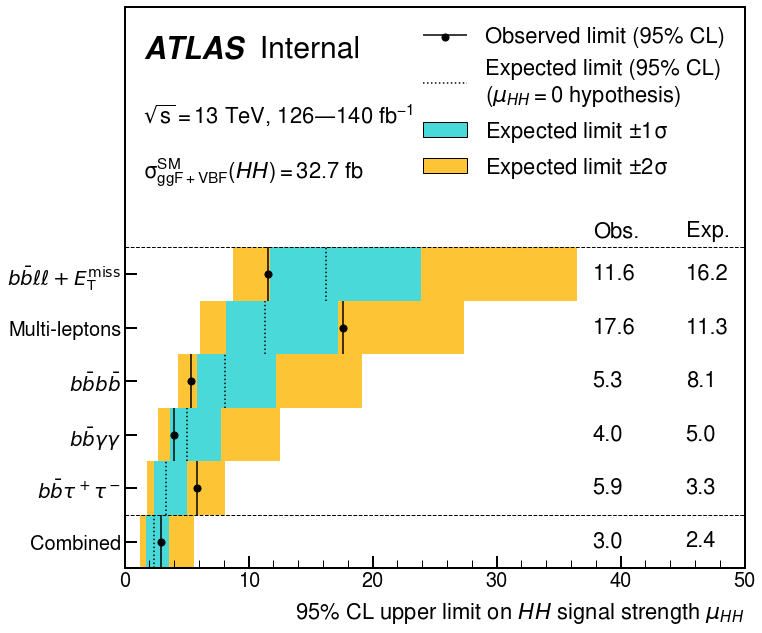

Save to /afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_xsec/figures/int/limit/limit_mu.pdf


/besfs5/users/cyz/HH_comb/hh_combination_fw/submodules/quickstats/quickstats/plots/upper_limit_1D_plot.py:189: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(xlim[0] - (xlim[1]/0.7 - xlim[1])*0.5, xlim[1]/0.7)
/tmp/ipykernel_25341/759876739.py:104: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([1,2,5,10,20,50, 100, 200, 500, 1000, 2000])


<Figure size 432x288 with 0 Axes>

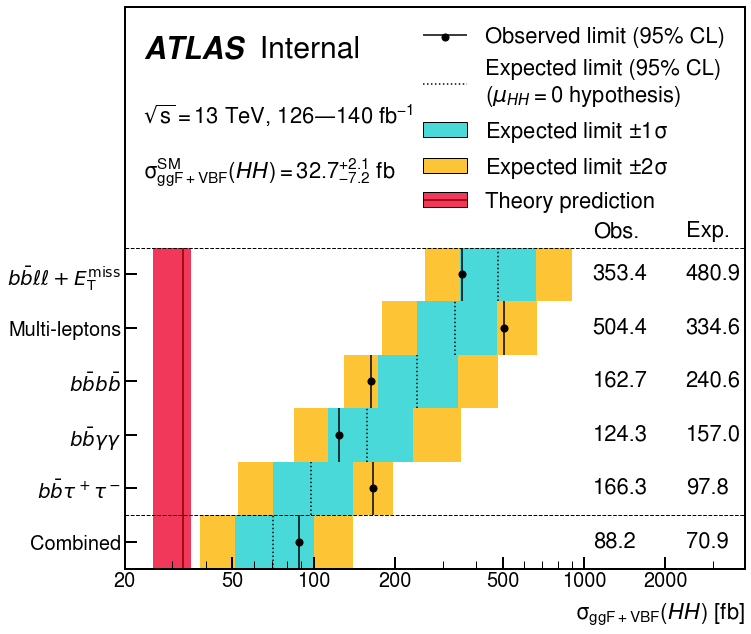

Save to /afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_xsec/figures/int/limit/limit_xsec.pdf


In [2]:
output_dir = "/afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_xsec"
import os
import json
from quickstats.plots import UpperLimit1DPlot
from matplotlib.ticker import LogLocator
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
def SM_error(ggf_cv, ggf_up, ggf_dn, vbf_cv, vbf_up, vbf_dn):
    up = 1 + np.sqrt(ggf_cv*ggf_cv*ggf_up*ggf_up + vbf_cv*vbf_cv*vbf_up*vbf_up) / (ggf_cv + vbf_cv)
    dn = 1 - np.sqrt(ggf_cv*ggf_cv*ggf_dn*ggf_dn + vbf_cv*vbf_cv*vbf_dn*vbf_dn) / (ggf_cv + vbf_cv)
    return up, dn

def remove_list(data):
    for k, v in data.items():
        for p,v_ in v.items():
            data[k][p] = v_[0]
    return data

plotdir = output_dir+'/figures/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
# combine_tags = ['bbbb_bbll_bbtautau_bbyy_ml-nocorr','bbbb_bbll_bbtautau_bbyy_ml-fullcorr']
combine_tags = ['bbbb_bbll_bbtautau_bbyy_ml-fullcorr']

labels = {
    'expected': 'Expected limit (95% CL)\n'+r'($\mathit{\mu_{HH}} = 0$ hypothesis)',
    'observed': 'Observed limit (95% CL)'
}
plotting_order = ['combined', 'bbtautau', 'bbyy', 'bbbb', 'ml', 'bbll']
# plotting_order = ['bbbb', 'bbtautau', 'bbyy', 'bbll'] # To blind multi-leptons
default_analysis_label_options = {'loc': (0.03, 0.95),
                                  'fontsize':30, 'energy': '13 TeV', 
                                  'lumi': '126—140 fb$^{-1}$',
                                  'status': status,
                                  'extra_text': r'$\sigma_{ggF+VBF}^{SM} (\mathit{HH})=32.7_{-7.2}^{+2.1}$ fb'}
styles = {
    'axis':{
        'tick_bothsides': False,
        'major_length': 12,
        },
    'legend':{
        'loc': 'upper right',
        },
}
configs = {
    'top_margin': 4.5,
}

def get_limit_data(scenario='nominal'):
    scale_factor = 1
    sm_limit_df = {}
    data = {}
    for c in channels + ['combined']:
        limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c == 'combined' else '', scenario, 'limits_xsec_br.json')
        if not os.path.exists(limit_path):
            print(limit_path, 'not found')
            continue
        data[c] = json.load(open(limit_path))
    data_dict = remove_list(data)
    sm_limit_df = pd.DataFrame(data_dict) * scale_factor
    return sm_limit_df

def plot_limit_mu(sm_limit_df,suffix):
    filtered_order = [col for col in plotting_order if col in sm_limit_df.columns]
    sm_limit_df = sm_limit_df[filtered_order]
    default_analysis_label_options['extra_text'] = r'$\sigma_{ggF+VBF}^{SM} (\mathit{HH})=32.7$ fb'

    plotter = UpperLimit1DPlot(sm_limit_df, channel_label_map, line_below=["bbtautau"], labels=labels,
                               analysis_label_options=default_analysis_label_options, styles=styles, config=configs)
    xlabel = r"95% CL upper limit on $\mathit{HH}$ signal strength $\mathit{\mu_{HH}}$"
    ax = plotter.draw(logx=False, xlabel=xlabel, draw_observed=True, draw_stat=False, sig_fig=1, add_text=True)
    ax.set_xlim([0, 50])
    os.makedirs(os.path.join(plotdir, f'{status}/limit'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/limit', f"limit_mu{suffix}.pdf")
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    print('Save to', filename)
    sm_limit_df.to_csv(filename.replace('.pdf', '.csv'))


def plot_limit_xsec(sm_limit_df,suffix=''):
    total_cross = 32.743
    sm_limit_df *= total_cross
    xerrhi, xerrlo = SM_error(ggf_cv=31.02, ggf_up=np.sqrt(np.square(0.03)+np.square(0.06)), ggf_dn=np.sqrt(np.square(0.03)+np.square(0.23)), vbf_cv=1.723, vbf_up=np.sqrt(np.square(0.0003)+np.square(0.021)), vbf_dn=np.sqrt(np.square(0.0004)+np.square(0.021)))
    xerrhi, xerrlo = xerrhi * total_cross, xerrlo * total_cross
    filtered_order = [col for col in plotting_order if col in sm_limit_df.columns]
    sm_limit_df = sm_limit_df[filtered_order]
    default_analysis_label_options['extra_text'] = r'$\sigma_{ggF+VBF}^{SM} (\mathit{HH})=32.7_{-7.2}^{+2.1}$ fb'
    styles['xtick'] = {
        'format': 'numeric',
        'steps':[1, 2, 3, 4, 5],
    }
    configs['top_margin'] = 4.5

    plotter = UpperLimit1DPlot(sm_limit_df, channel_label_map, line_below=["bbtautau"], labels=labels,
                               analysis_label_options=default_analysis_label_options, styles=styles, config=configs)
    plotter.add_curve(x=total_cross, xerrlo=xerrlo, xerrhi=xerrhi, label="Theory prediction")
    xlabel = r"$\sigma_{ggF+VBF}(\mathit{HH})$ [fb]"
    ax = plotter.draw(logx=True, xlabel=xlabel, draw_observed=True, draw_stat=False, sig_fig=1, add_text=True)
    ax.set_xlim([20, 120*total_cross])
    ax.xaxis.set_major_locator(LogLocator(base=10, subs=(1,2,5)))
    ax.set_xticklabels([1,2,5,10,20,50, 100, 200, 500, 1000, 2000])
    os.makedirs(os.path.join(plotdir, f'{status}/limit'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/limit', f"limit_xsec{suffix}.pdf")
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    print('Save to', filename)
    sm_limit_df.to_csv(filename.replace('.pdf', '.csv'))

for combine_tag in combine_tags:
    suffix = ''
    if 'nocorr' in combine_tag:
        suffix = '_nocorr'
    sm_limit_df = get_limit_data()
    plot_limit_mu(sm_limit_df,suffix)
    sm_limit_df_xsec = get_limit_data('xsec')
    plot_limit_xsec(sm_limit_df_xsec,suffix)


## ggF

<Figure size 432x288 with 0 Axes>

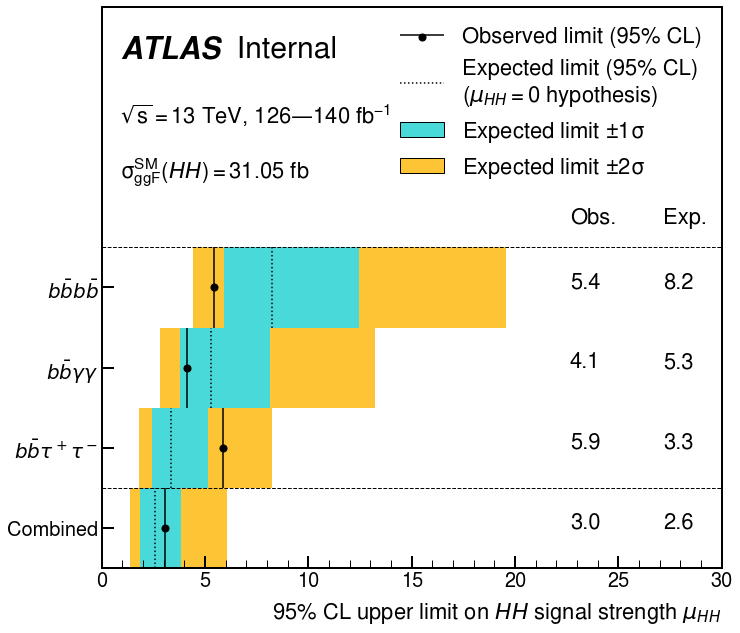

Save to /afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_ggF/figures/int/limit/limit_mu_ggF.pdf


In [2]:
mode = "ggF"
output_dir = f"/afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_{mode}"
channel = 'bbyy,bbbb,bbtautau'
channels = channel.split(',')
import os
import json
from quickstats.plots import UpperLimit1DPlot
from matplotlib.ticker import LogLocator
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

def remove_list(data):
    for k, v in data.items():
        for p,v_ in v.items():
            data[k][p] = v_[0]
    return data

plotdir = output_dir+'/figures/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
# combine_tags = ['bbbb_bbll_bbtautau_bbyy_ml-nocorr','bbbb_bbll_bbtautau_bbyy_ml-fullcorr']
combine_tags = ['bbbb_bbtautau_bbyy-fullcorr']

labels = {
    'expected': 'Expected limit (95% CL)\n'+r'($\mathit{\mu_{HH}} = 0$ hypothesis)',
    'observed': 'Observed limit (95% CL)'
}
plotting_order = ['combined', 'bbtautau', 'bbyy', 'bbbb']
# plotting_order = ['bbbb', 'bbtautau', 'bbyy', 'bbll'] # To blind multi-leptons
default_analysis_label_options = {'loc': (0.03, 0.95),
                                  'fontsize':30, 'energy': '13 TeV', 
                                  'lumi': '126—140 fb$^{-1}$',
                                  'status': status,
                                  'extra_text': r'$\sigma_{ggF+VBF}^{SM} (\mathit{HH})=32.7_{-7.2}^{+2.1}$ fb'}
styles = {
    'axis':{
        'tick_bothsides': False,
        'major_length': 12,
        },
    'legend':{
        'loc': 'upper right',
        },
}
configs = {
    'top_margin': 3.0,
}

def get_limit_data(scenario='nominal'):
    scale_factor = 1
    sm_limit_df = {}
    data = {}
    for c in channels + ['combined']:
        limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c == 'combined' else '', scenario, f"limits_mu_{mode}.json")
        if not os.path.exists(limit_path):
            print(limit_path, 'not found')
            continue
        data[c] = json.load(open(limit_path))
    data_dict = remove_list(data)
    sm_limit_df = pd.DataFrame(data_dict) * scale_factor
    return sm_limit_df

def plot_limit_mu(sm_limit_df,suffix):
    filtered_order = [col for col in plotting_order if col in sm_limit_df.columns]
    sm_limit_df = sm_limit_df[filtered_order]
    default_analysis_label_options['extra_text'] = r'$\sigma_{ggF}^{SM} (\mathit{HH})=31.05$ fb' if mode == "ggF" else r'$\sigma_{VBF}^{SM} (\mathit{HH})=1.73$ fb'

    plotter = UpperLimit1DPlot(sm_limit_df, channel_label_map, line_below=["bbtautau"], labels=labels,
                               analysis_label_options=default_analysis_label_options, styles=styles, config=configs)
    xlabel = r"95% CL upper limit on $\mathit{HH}$ signal strength $\mathit{\mu_{HH}}$"
    ax = plotter.draw(logx=False, xlabel=xlabel, draw_observed=True, draw_stat=False, sig_fig=1, add_text=True)
    ax.set_xlim([0, 30])
    os.makedirs(os.path.join(plotdir, f'{status}/limit'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/limit', f"limit_mu{suffix}_{mode}.pdf")
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    print('Save to', filename)
    sm_limit_df.to_csv(filename.replace('.pdf', '.csv'))

for combine_tag in combine_tags:
    suffix = ''
    if 'nocorr' in combine_tag:
        suffix = '_nocorr'
    sm_limit_df = get_limit_data()
    plot_limit_mu(sm_limit_df,suffix)


## VBF

<Figure size 432x288 with 0 Axes>

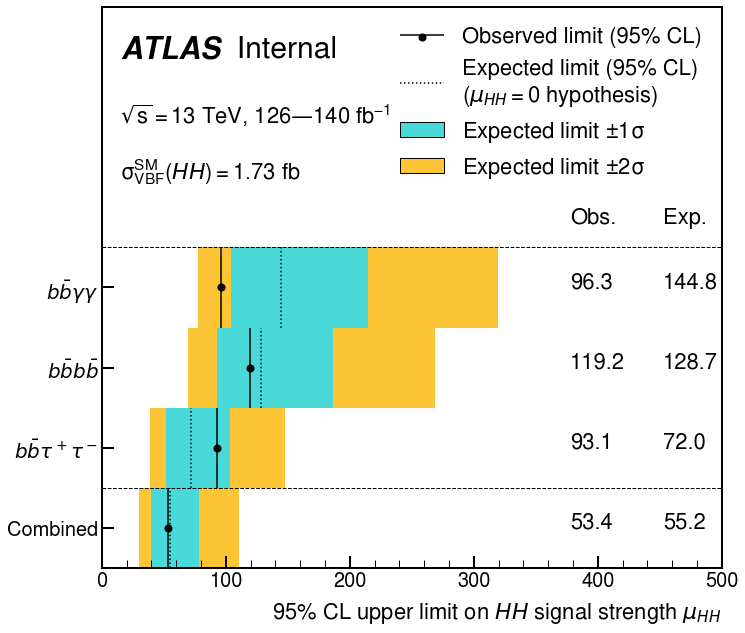

Save to /afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_VBF/figures/int/limit/limit_mu_VBF.pdf


In [3]:
mode = "VBF"
output_dir = f"/afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_{mode}"
channel = 'bbyy,bbbb,bbtautau'
channels = channel.split(',')
import os
import json
from quickstats.plots import UpperLimit1DPlot
from matplotlib.ticker import LogLocator
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

def remove_list(data):
    for k, v in data.items():
        for p,v_ in v.items():
            data[k][p] = v_[0]
    return data

plotdir = output_dir+'/figures/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
# combine_tags = ['bbbb_bbll_bbtautau_bbyy_ml-nocorr','bbbb_bbll_bbtautau_bbyy_ml-fullcorr']
combine_tags = ['bbbb_bbtautau_bbyy-fullcorr']

labels = {
    'expected': 'Expected limit (95% CL)\n'+r'($\mathit{\mu_{HH}} = 0$ hypothesis)',
    'observed': 'Observed limit (95% CL)'
}
plotting_order = ['combined', 'bbtautau', 'bbbb', 'bbyy']
# plotting_order = ['bbbb', 'bbtautau', 'bbyy', 'bbll'] # To blind multi-leptons
default_analysis_label_options = {'loc': (0.03, 0.95),
                                  'fontsize':30, 'energy': '13 TeV', 
                                  'lumi': '126—140 fb$^{-1}$',
                                  'status': status,
                                  'extra_text': r'$\sigma_{ggF+VBF}^{SM} (\mathit{HH})=32.7_{-7.2}^{+2.1}$ fb'}
styles = {
    'axis':{
        'tick_bothsides': False,
        'major_length': 12,
        },
    'legend':{
        'loc': 'upper right',
        },
}
configs = {
    'top_margin': 3.0,
}

def get_limit_data(scenario='nominal'):
    scale_factor = 1
    sm_limit_df = {}
    data = {}
    for c in channels + ['combined']:
        limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c == 'combined' else '', scenario, f"limits_mu_{mode}.json")
        if not os.path.exists(limit_path):
            print(limit_path, 'not found')
            continue
        data[c] = json.load(open(limit_path))
    data_dict = remove_list(data)
    sm_limit_df = pd.DataFrame(data_dict) * scale_factor
    return sm_limit_df

def plot_limit_mu(sm_limit_df,suffix):
    filtered_order = [col for col in plotting_order if col in sm_limit_df.columns]
    sm_limit_df = sm_limit_df[filtered_order]
    default_analysis_label_options['extra_text'] = r'$\sigma_{ggF}^{SM} (\mathit{HH})=31.05$ fb' if mode == "ggF" else r'$\sigma_{VBF}^{SM} (\mathit{HH})=1.73$ fb'

    plotter = UpperLimit1DPlot(sm_limit_df, channel_label_map, line_below=["bbtautau"], labels=labels,
                               analysis_label_options=default_analysis_label_options, styles=styles, config=configs)
    xlabel = r"95% CL upper limit on $\mathit{HH}$ signal strength $\mathit{\mu_{HH}}$"
    ax = plotter.draw(logx=False, xlabel=xlabel, draw_observed=True, draw_stat=False, sig_fig=1, add_text=True)
    ax.set_xlim([0, 500])
    os.makedirs(os.path.join(plotdir, f'{status}/limit'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/limit', f"limit_mu{suffix}_{mode}.pdf")
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    print('Save to', filename)
    sm_limit_df.to_csv(filename.replace('.pdf', '.csv'))

for combine_tag in combine_tags:
    suffix = ''
    if 'nocorr' in combine_tag:
        suffix = '_nocorr'
    sm_limit_df = get_limit_data()
    plot_limit_mu(sm_limit_df,suffix)


# $\kappa_\lambda$, $\kappa_{2V}$

## Likelihood

[0.35591639]
klambda_expected bbyy 68%: [-1.1912  6.0829] 95%: [-2.8244  7.802 ]
klambda_expected bbtautau 68%: [-1.0283  7.631 ] 95%: [-2.5321  9.236 ]
klambda_expected bbbb 68%: [-2.7723  8.8643] 95%: [-5.1353 11.1989]
klambda_expected bbll 68%: [-5.6338 12.3047] 95%: [-8.8071 16.0049]


<Figure size 432x288 with 0 Axes>

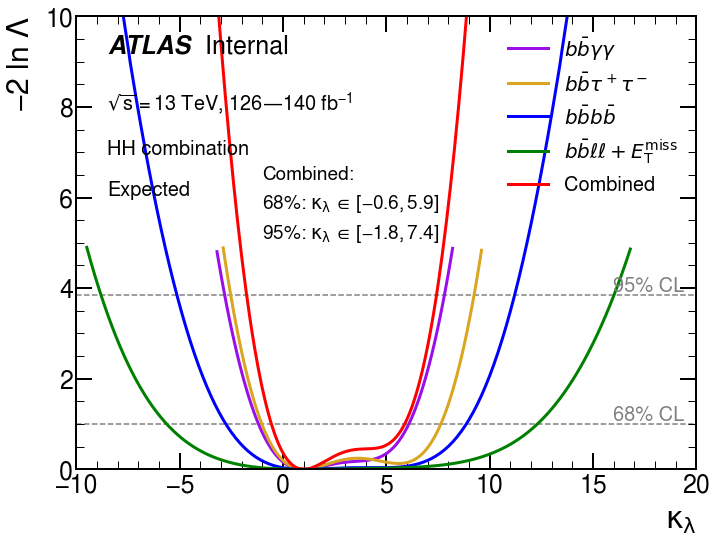

Save /afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_kl/figures//int/likelihood_scan/klambda_expected_int.pdf
[1.78370682]
klambda_observed bbyy 68%: [0.5375 5.2408] 95%: [-1.4407  6.9179]
klambda_observed bbtautau 68%: [-1.7145  3.3037] 95%: [-3.151   9.0235]
klambda_observed bbbb 68%: [0.6315 8.8198] 95%: [-3.3177 10.9854]
klambda_observed bbll 68%: [-2.2139  9.0552] 95%: [-6.1761 13.276 ]


<Figure size 432x288 with 0 Axes>

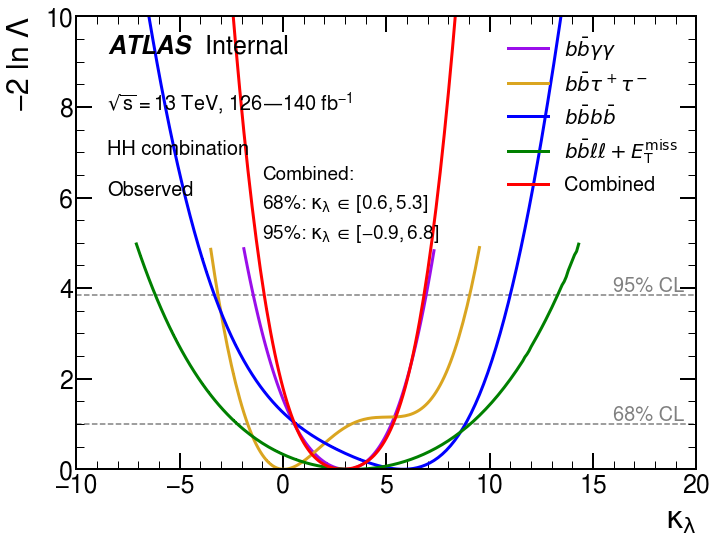

Save /afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_kl/figures//int/likelihood_scan/klambda_observed_int.pdf
[14.12505616]
k2v_expected bbyy 68%: [-0.329   2.5286] 95%: [-1.1061  3.3075]
k2v_expected bbtautau 68%: [0.1738 2.0022] 95%: [-0.2402  2.4143]
k2v_expected bbbb 68%: [0.6316 1.4035] 95%: [0.3808 1.6563]
k2v_expected bbll 68%: [0.0551 2.1171] 95%: [-0.4723  2.6436]


<Figure size 432x288 with 0 Axes>

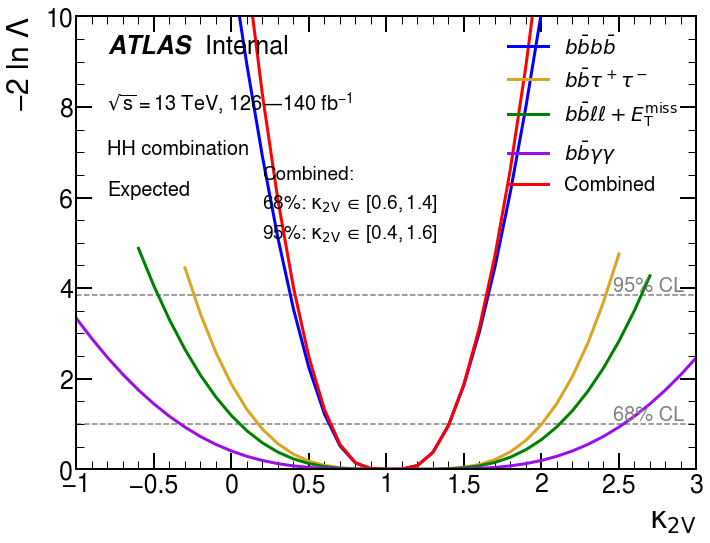

Save /afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_k2v/figures//int/likelihood_scan/k2v_expected_int.pdf
[18.37518471]
k2v_observed bbyy 68%: [0.2727 1.9274] 95%: [-0.4763  2.6775]
k2v_observed bbtautau 68%: [-0.1342  2.2986] 95%: [-0.5138  2.6795]
k2v_observed bbbb 68%: [0.7898 1.239 ] 95%: [0.5483 1.4895]
k2v_observed bbll 68%: [0.3685 1.7856] 95%: [-0.1805  2.3376]


<Figure size 432x288 with 0 Axes>

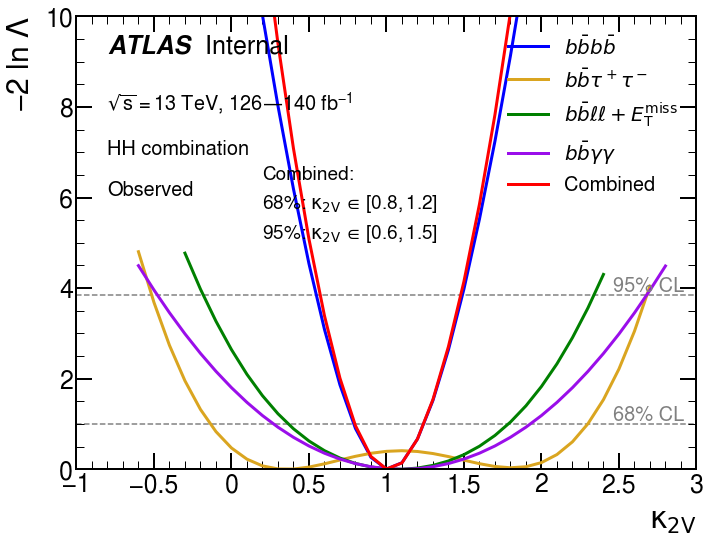

Save /afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_k2v/figures//int/likelihood_scan/k2v_observed_int.pdf


In [6]:
output_dir_kl = "/afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_kl"
output_dir_k2v = "/afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_k2v"
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from quickstats.maths.interpolation import get_intervals
from quickstats.plots import Likelihood1DPlot
from quickstats.plots.color_schemes import QUICKSTATS_PALETTES
from scipy.interpolate import interp1d

plotdir_kl = output_dir_kl+'/figures/'
plotdir_k2v = output_dir_k2v+'/figures/'
combinetags = ['bbbb_bbll_bbtautau_bbyy-fullcorr']

styles_map = {
    'bbyy': {"color": "#9A0EEA", "marker": ","},
    'bbbb': {"color": 'b', "marker": ","},
    'bbtautau': {"color": "#DAA520", "marker": ","},
    'bbll': {"color": "g", "marker": ","},
    'combined': {"color": "r", "marker": ","},
}
channels = ['bbyy', 'bbtautau', 'bbbb', 'bbll']

styles = {
    'legend': {
        'loc': 'upper right'
    },
    'plot': {
        'linewidth': 3,
    },
    'axis': {
        'labelsize': 25,
    },
    'xlabel': {
        'fontsize': 30,
    },
    'ylabel': {
        'fontsize': 30,
    }
}
anno_op = {
    'x': 0.3,
    'y': 0.64,
    'dy': 0.065,
    'font_size': 19
}
label_options = {
    'status': status,
    'loc': (0.05, 0.96),
    'fontsize': 25, # ATLAS
    'energy': '13 TeV',
    'lumi': r'126—140 fb$^{-1}$',
}

def get_interval(df, level):
    xvalues = df['klambda'].to_numpy()
    yvalues = df['qmu'].to_numpy()
    func_theory = interp1d(xvalues, yvalues)
    x_new = np.arange(min(xvalues), max(xvalues), 0.0001)
    y_new = func_theory(x_new)
    asign = np.sign(y_new-level)
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    intersections = x_new[signchange==1]
    return intersections

def get_likelihood_data(variable, outdir, scenario='nominal'):
    data = {}
    filename = 'likelihoods_' + variable + '.json'
    channels = ['bbyy', 'bbtautau', 'bbbb', 'bbll'] if variable=='klambda' else ['bbbb', 'bbtautau', 'bbll', 'bbyy']
    for c in channels + ['combined']:
        likelihood_path = os.path.join(outdir, 'likelihood', resonant_type, c, combine_tag if c=='combined' else '', scenario, filename)
        if not os.path.exists(likelihood_path):
            print(likelihood_path, 'not exist')
            continue
        data[c] = json.load(open(likelihood_path))
    return data

def data_loading_lh(scenario, variable, outdir, cut=1000):
    likelihood_df, uncond_df = {}, {}
    data = get_likelihood_data(variable, outdir, scenario)
    for c in data:
        df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
        df_uncond = df.drop(index=df.index[1:], axis=0, inplace=False)
        df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
        if c=='bbbb' or c=='combined':
            df_scan = df_scan.drop(df_scan[df_scan['qmu']>5.5].index)
        else:
            df_scan = df_scan.drop(df_scan[df_scan['qmu']>cut].index)
        likelihood_df[c] = df_scan
        uncond_df[c] = df_uncond
    return likelihood_df, uncond_df

def plot(likelihood_df, variable, obs, plotdir, xmin = -15, xmax = 20, ymin=0, ymax = 12, xlabel=r"$\mathrm{\kappa_{\lambda}}$", xattrib='klambda', yattrib='qmu', status='int'):
    dic = {}
    options = {}
    config = {
        'sigma_values': (1, 3.84),
        'sigma_levels': ('1sigma', '0.95'),
        'sigma_names': ('68%', '95%'),
        'sigma_pos': 0.89,
     }
    options['ylabel'] = r"$-2\ ln\ \Lambda$"
    text = "Observed" if obs == 'observed' else "Expected"
    label_options['extra_text'] = channel_text['combined'] + f"//{text}"
    
    df_index = f'{variable}_{obs}'
    if len(likelihood_df[df_index])==0:
        return
    plotter = Likelihood1DPlot(likelihood_df[df_index], label_map=channel_label_map, styles_map=styles_map,
                            styles=styles, analysis_label_options=label_options,
                              config = config)
    ax = plotter.draw(xlabel=xlabel, ymin=ymin, ymax=ymax, xmin=xmin, xmax=xmax, xattrib=xattrib, yattrib=yattrib, interval_format='68_95', **options)

    if 'combined' in likelihood_df[df_index] and yattrib=='qmu':
        dic['combined'] = {}
        intersections_1 = get_intervals(likelihood_df[df_index]['combined'][variable].values, likelihood_df[df_index]['combined']['qmu'].values, level=config['sigma_values'][0], delta=0.0001)[0]
        intersections_2 = get_intervals(likelihood_df[df_index]['combined'][variable].values, likelihood_df[df_index]['combined']['qmu'].values, level=config['sigma_values'][1], delta=0.0001)[0]
        dic['combined'][f"{config['sigma_values'][0]} low"] = intersections_1[0]
        dic['combined'][f"{config['sigma_values'][0]} high"] = intersections_1[1]
        dic['combined'][f"{config['sigma_values'][1]} low"] = intersections_2[0]
        dic['combined'][f"{config['sigma_values'][1]} high"] = intersections_2[1]
        ddd = likelihood_df[df_index]['combined']
        print(ddd[ddd[variable] == 0]['qmu'].values)

        ax.annotate(r'Combined:', 
                    (anno_op['x'], anno_op['y']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
        ax.annotate(r'$68\%$: '+xlabel+r'$ \in [%.1f, %.1f]$' %(intersections_1[0], intersections_1[1]), 
                    (anno_op['x'], anno_op['y'] - anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
        ax.annotate(r'$95\%$: '+xlabel+r'$ \in [%.1f, %.1f]$' %(intersections_2[0], intersections_2[1]), 
                    (anno_op['x'], anno_op['y'] - 2 * anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])


    for c in channels:
        if c not in dic:
            dic[c] = {}
        try:
            intersections_1 = get_intervals(likelihood_df[df_index][c][variable].values, likelihood_df[df_index][c]['qmu'].values, level=config['sigma_values'][0], delta=0.0001)[0]
            intersections_2 = get_intervals(likelihood_df[df_index][c][variable].values, likelihood_df[df_index][c]['qmu'].values, level=config['sigma_values'][1], delta=0.0001)[0]
            dic[c][f"{config['sigma_values'][0]} low"] = intersections_1[0]
            dic[c][f"{config['sigma_values'][0]} high"] = intersections_1[1]
            dic[c][f"{config['sigma_values'][1]} low"] = intersections_2[0]
            dic[c][f"{config['sigma_values'][1]} high"] = intersections_2[1]
            print(df_index, c, '68%:', intersections_1, '95%:', intersections_2)
        except:
            print('Failed to get interval for', df_index, c)
            continue
        
    savefolder = plotdir + f'/{status}/likelihood_scan/'
    os.makedirs(savefolder, exist_ok=True)
    suffix=''
    if 'nocorr' in combine_tag: suffix='_nocorr'
    filename = savefolder+f"{df_index}_{status}{suffix}.pdf"
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    print('Save', filename)
    dic = json.dumps(dic, indent=4, separators=(',', ': '))
    with open(filename.replace('.pdf','.json'), 'w') as json_file:
        json_file.write(dic)


def kappa_name(variable):
    name_map = {
        'klambda': r"$\mathrm{\kappa_{\lambda}}$",
        'k2v': r"$\mathrm{\kappa_{2V}}$"
    }
    xrange = {
        'klambda': (-10, 20),
        'k2v': (-1, 3)
    }
    yrange = {
        'klambda':  (0, 10),
        'k2v': (0, 10)
    }
    xattrib = {
        'klambda': 'klambda',
        'k2v': 'k2v'
    }
    return name_map[variable], xattrib[variable], xrange[variable], yrange[variable]

variables = ['klambda', 'k2v']
obs = ['expected', 'observed']

for combine_tag in combinetags:
    likelihood_df, uncond_df = {}, {}
    for o in obs:
        for variable in variables:
            try:
                likelihood_df[f'{variable}_{o}'], uncond_df[f'{variable}_{o}'] = data_loading_lh('nominal' if o=='observed' else o, variable, output_dir_kl if variable=='klambda' else output_dir_k2v, cut=5)
            except:
                print(o, variable)
                continue

    for variable in variables:
        for o in obs:
            xlabel, xattrib, xrange, yrange = kappa_name(variable)
            if variable=='klambda':
                plotdir = plotdir_kl
            else:
                plotdir = plotdir_k2v
            df = plot(likelihood_df, variable, o, plotdir, xlabel=xlabel, xattrib=xattrib, xmin = xrange[0], xmax = xrange[1], ymin=yrange[0], ymax = yrange[1], status=status)

## xsec

IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

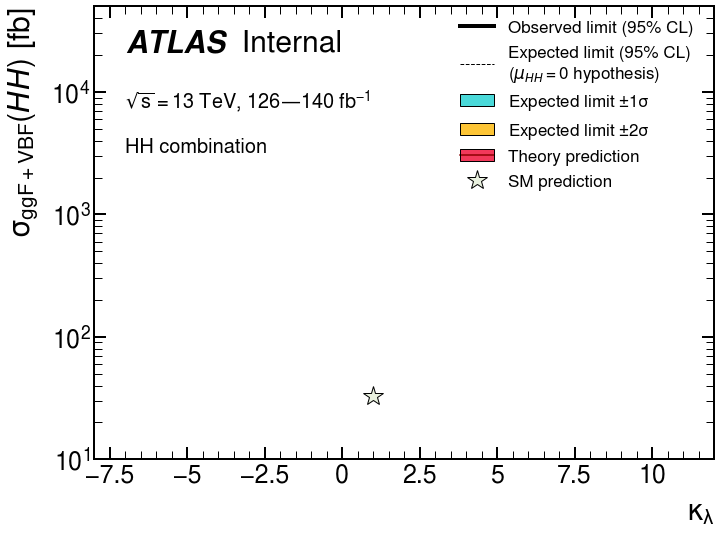

In [6]:
output_dir = "/afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_xsec_scan"
combfolder = 'bbbb_bbtautau_bbyy-fullcorr'
import numpy as np
import os,json
import pandas as pd
from quickstats.plots import UpperLimit2DPlot
import matplotlib.pyplot as plt
def get_xsection_scan_limit(poi = 'kl'):
    kl_param_limit_df = {}
    channels = ['bbtautau','bbbb','bbyy']
    data = {}
    for channel in channels+['combined']:
        limit_path = os.path.join(output_dir, 'limit/nonres', channel, combfolder if channel=='combined' else '', 'xsec_'+poi, 'limits_xsec_br.json')
        data[channel] = json.load(open(limit_path))
        
    for channel in data:
        df = pd.DataFrame(data[channel]).set_index([poi])
        kl_param_limit_df[channel] = df

    return kl_param_limit_df
def get_intersections2(lambdas, n_exp, lambdas_th, n_th):
    # get the intersection between expected and theory prediction
    
    # interpolate expected limit with same number of datapoints as used in theory prediction
    interpolated_limit = np.interp(lambdas_th, lambdas, n_exp) 

    #limitm1 = n*np.array(limit_bands[0]) - 1
    limitm1 = interpolated_limit - n_th 
    idx = np.argwhere(np.diff(np.sign(limitm1))).flatten() # determines what index intersection points are at 

    #linear interpolation to get exact intercepts: x = x1 + (x2-x1)/(y2-y1) * (y-y1)
    #y = 0 -> x = x1 - (x2-x1)/(y2-y1) * y1
    intersections = [lambdas_th[x] - (lambdas_th[x+1] - lambdas_th[x])/(limitm1[x+1] - limitm1[x]) * limitm1[x] for x in idx]
    return intersections
def theory_cross_section_kl(kl, production='all', mH=125, s=13):
    sm_xsec_vbf = {
        '125.09': 1.723,
        '125': 1.726,
    }
    sm_xsec_ggF = {
        '125.09': 31.02,
        '125': 31.05,
    }
    SCALE_GGF = sm_xsec_ggF[str(mH)]/31.0358  #correct to xs at mH
    SCALE_VBF = sm_xsec_vbf[str(mH)]/(4.581-4.245+1.359)

    kl = np.array(kl)
    
    # Calculate ggF theory curve
    if production.lower() != 'vbf':
        #https://twiki.cern.ch/twiki/bin/view/LHCPhysics/LHCHWGHH?redirectedfrom=LHCPhysics.LHCHXSWGHH#Latest_recommendations_for_gluon
        xs_ggF = (70.3874-50.4111*kl+11.0595*np.square(kl))*SCALE_GGF #XS in fb
        xs_ggF_up = xs_ggF * np.sqrt(np.square((np.maximum(76.6075 - 56.4818*kl + 12.635*np.square(kl), 75.4617 - 56.3164*kl + 12.7135*np.square(kl)) * SCALE_GGF / xs_ggF - 1)) + 0.03**2)
        xs_ggF_down = xs_ggF * np.sqrt(np.square((np.minimum(57.6809 - 42.9905*kl + 9.58474*np.square(kl), 58.3769 - 43.9657*kl + 9.87094*np.square(kl)) * SCALE_GGF / xs_ggF - 1)) + 0.03**2)
    
    # Calculate VBF theory curve
    if production.lower() != 'ggf':
        #https://indico.cern.ch/event/995807/contributions/4184798/attachments/2175756/3683303/VBFXSec.pdf
        xs_VBF = (4.581-4.245*kl+1.359*np.square(kl))*SCALE_VBF
        xs_VBF_up = xs_VBF * np.sqrt(0.0003**2 + 0.021**2)
        xs_VBF_down = xs_VBF * np.sqrt(0.0004**2 + 0.021**2)
    
    # Calculate ggF+VBF theory curve
    if production.lower() == 'all':
        xs_HH = xs_ggF + xs_VBF
        xs_HH_up = np.sqrt(np.square(xs_ggF_up) + np.square(xs_VBF_up))
        xs_HH_down = np.sqrt(np.square(xs_ggF_down) + np.square(xs_VBF_down))

    if s == 14:
        xs_HH = xs_ggF * 1.18 + xs_VBF * 1.19
        xs_HH_up /= 2
        xs_HH_down /= 2
        assert(production.lower() == 'all'), 'for ggF or VBF only projection, please revisit factors on the theory error.'
        
    if production.lower() == 'ggf':
        return xs_ggF, xs_ggF+xs_ggF_up, xs_ggF-xs_ggF_down
    elif production.lower() == 'vbf':
        return xs_VBF, xs_VBF+xs_VBF_up, xs_VBF-xs_VBF_down
    elif production.lower() == 'all':
        return xs_HH, xs_HH+xs_HH_up, xs_HH-xs_HH_down
    else:
        assert(0), f'production {production} is not implemented'
def get_theory_curve(kl):
    xs_HH, xs_HH_up, xs_HH_down = theory_cross_section_kl(kl)
    return kl, xs_HH, xs_HH_up, xs_HH_down
def plot_individual(channel, ax, plotter, kl_param_limit_df, linewidth=3, xloc = 0.7):
    from copy import deepcopy
    color_pallete = {
        'bbbb': 'b',
        'bbtautau': "#008F00",
        'bbyy': "#9A0EEA",
        'combined': 'k',
    }
    handles_map = {}
    for subchannel in kl_param_limit_df:
        data = kl_param_limit_df[subchannel]
        indices = data.index.astype(float).values
        x0, y0, xh, xl = get_theory_curve(indices)
        exp_limits = data['0'].values * y0
        obs_limits = data['obs'].values * y0
        if subchannel == channel:
            alpha = 0
        else:
            alpha = 1
        ax.semilogy(indices, exp_limits, color=color_pallete[subchannel], linestyle='--', alpha=alpha, label=channel_label_map[subchannel], linewidth=linewidth)
        handle_channels = ax.semilogy(indices, obs_limits, color=color_pallete[subchannel], linestyle='-', linewidth=linewidth, alpha=1, label=channel_label_map[subchannel])
        handles_map[subchannel] = handle_channels[0]

    def update_legend_handles(handles):
        import matplotlib
        legend_data = {}

        for key in handles:
            handle = handles[key]
            if isinstance(handle, matplotlib.container.Container):
                label = handle.get_label()
            elif isinstance(handle, (tuple, list)):
                label = handle[0].get_label()
            else:
                label = handle.get_label()
            if label and not label.startswith('_'):
                legend_data[key] = {
                    'handle': handle,
                    'label': label
                }
            else:
                raise RuntimeError(f"the handle {handle} does not have an associated label")
        return legend_data

    def get_legend_handles_labels(legend_data):
        handles = []
        labels = []

        for key in ['bbyy', 'bbtautau', 'bbbb', 'combined']:
            if key in legend_data:
                handle = legend_data[key]['handle']
                label = legend_data[key]['label']
                handles.append(handle)
                labels.append(label)
        return handles, labels

    legend_data = update_legend_handles(handles_map)
    handles_sec, labels_sec = get_legend_handles_labels(legend_data)

    ax.add_artist(ax.get_legend())
    sec_style = deepcopy(plotter.styles['legend'])
    sec_style['loc'] = (xloc, 0.02)
    ax.legend(handles_sec, labels_sec, **sec_style)
def plot_xsection_scan_kl(kl_param_limit_df, channel, production, mH=125, poi='kl', xmin=None, xmax=None, ymin=None, ymax=None, add_individual=False, disable_error=False, status='int'):

    analysis_label_options = {
        'status': status,
        'loc': (0.05, 0.95),
        'energy': '13 TeV',
        'lumi': r'126—140 fb$^{-1}$',
        'fontsize': 30,
        'extra_text':channel_text[channel] # + '//Parameterised workspace'    
    }
    styles = {
        'legend':{
            'loc': (0.58, 0.58) if not disable_error else (0.58, 0.73),
            'fontsize': 17
        },
        'axis':{
            'tick_bothsides': True,
            'major_length': 12,
            'labelsize': 25,
        },
        'xlabel': {
            'fontsize': 30,
        },
        'ylabel': {
            'fontsize': 30,
        },
    }
    
    poi_name = {
        'kl': r'$\kappa_\lambda$',
        'k2v': r'$\kappa_{2V}$',
        'kv': r'$\kappa_{V}$',
    }
    ylabel = {
        'ggf': r"$\sigma_{ggF}(\mathit{HH})$ [fb]",
        'vbf': r"$\sigma_{VBF}(\mathit{HH})$ [fb]",
        'all': r"$\sigma_{ggF+VBF}(\mathit{HH})$ [fb]",
    }
    config = {
        'observed_plot_styles': {
            'marker': None,
            'alpha': 1,
            'linewidth': 4
        }}
    
    klambda_values =  kl_param_limit_df['combined'].index.astype(float).values
    theory_xs_values, theory_xs_upper, theory_xs_lower = theory_cross_section_kl(klambda_values, production)

    klambda_values_dense = np.linspace(min(klambda_values), max(klambda_values), 200000) 
    theory_xs_values_dense, theory_xs_upper_dense, theory_xs_lower_dense = theory_cross_section_kl(klambda_values_dense, production)

    plotter = UpperLimit2DPlot(kl_param_limit_df[channel], labels={'expected': 'Expected limit (95% CL)\n'+r'($\mathit{\mu_{HH}} = 0$ hypothesis)'},
                               theory_func=get_theory_curve, styles=styles,config=config,
                               analysis_label_options=analysis_label_options)
    plotter.add_curve(klambda_values_dense, theory_xs_values_dense, theory_xs_lower_dense, theory_xs_upper_dense, 
                      label="Theory prediction")
    plotter.add_highlight(1, theory_cross_section_kl(1, production)[0],
                          label="SM prediction")
    xmin = kl_param_limit_df[channel].index.min() if not xmin else xmin
    xmax = kl_param_limit_df[channel].index.max() if not xmax else xmax
    ylim = {
        'kl': [(10 if not ymin else ymin), (7e4 if not ymax else ymax)],
        'k2v': [1, 1e4],
    }
    ax = plotter.draw(xlabel=poi_name[poi], ylabel=ylabel[production.lower()],scale_theory=True, draw_theory_curve=True, 
                 draw_observed=True, logy=True, ylim=ylim[poi], xlim=[xmin, xmax], draw_errorband=not disable_error)

    intersections = get_intersections2(klambda_values, 
                                      theory_xs_values*kl_param_limit_df[channel]['0'],
                                      klambda_values_dense, theory_xs_values_dense)

    intersections_obs = get_intersections2(klambda_values, 
                                      theory_xs_values*kl_param_limit_df[channel]['obs'],
                                      klambda_values_dense, theory_xs_values_dense)
    print(channel, 'obs', intersections_obs[0], intersections_obs[1])
    print(channel, 'exp', intersections[0], intersections[1])
    
    # Add individual curves on top
    if channel == 'combined' and add_individual:
        plot_individual(channel, ax, plotter, kl_param_limit_df)

    save_foler = output_dir+f"/figures/xsection_scan/{status}/"
    os.makedirs(save_foler, exist_ok=True)
    suffix = ''
    if add_individual:
        suffix += '_withindiv'
    if disable_error:
        suffix += '_noError'
    plt.savefig(save_foler+f"{poi}_limit_{channel}{suffix}_{status}.pdf", bbox_inches="tight")
    print("save to", save_foler)
    plt.show()

kl_param_limit_df = get_xsection_scan_limit(poi = 'kl')
production = 'all'
status = 'int'
plot_xsection_scan_kl(kl_param_limit_df, 'combined', production, 'kl', xmin=-8, xmax=12, ymax=5e4, add_individual=True, status=status)

combined obs 0.49547475628887105 1.5497200112059109
combined exp 0.40071356468281905 1.6516517726735598
save to /afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_VBFxsec_scan/figures/xsection_scan/int/k2v_limit_combined_withindiv_int.pdf


<Figure size 432x288 with 0 Axes>

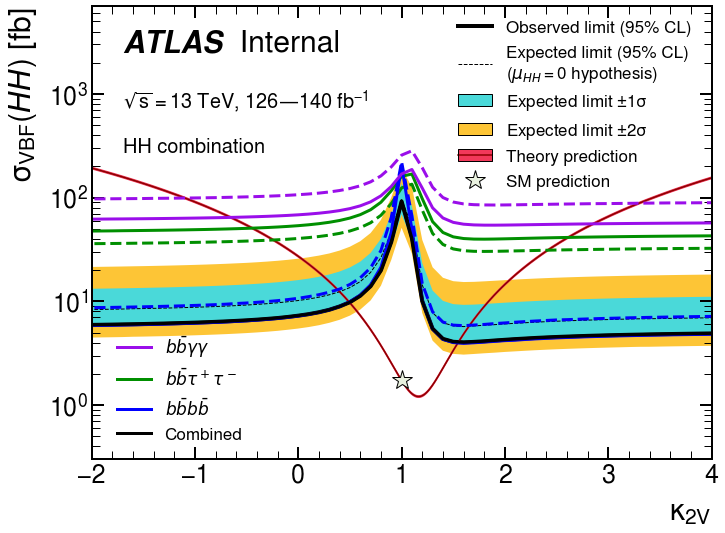

In [5]:
output_dir = "/afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_VBFxsec_scan"
combfolder = 'bbbb_bbtautau_bbyy-fullcorr'
import sympy
def get_xsection_scan_limit(poi = 'k2v'):
    kl_param_limit_df = {}
    channels = ['bbtautau','bbbb','bbyy']
    data = {}
    for channel in channels+['combined']:
        limit_path = os.path.join(output_dir, 'limit/nonres', channel, combfolder if channel=='combined' else '', 'xsec_'+poi, 'limits_mu_VBF.json')
        data[channel] = json.load(open(limit_path))
        
    for channel in data:
        df = pd.DataFrame(data[channel]).set_index([poi])
        kl_param_limit_df[channel] = df

    return kl_param_limit_df
def get_theory_combination_function(mH=125):
    # https://twiki.cern.ch/twiki/bin/view/LHCPhysics/LHCHWGHH?redirectedfrom=LHCPhysics.LHCHXSWGHH
    sm_N3LO_xsec = {
        '125.09': 1.723,
        '125': 1.726,
    }[str(mH)]

    # Below xsec values are from AMI as of 9 December 2020, for tag: e8263_e7400_s3126_r10201
    basis_xsec_list = [
        # ([k2v, kl, kv], xsec)
        ([1, 1, 1], 1.18),
        ([1.5, 1, 1], 2.30),
        ([2, 1, 1], 9.97),
        ([1, 0, 1], 3.17),
        ([1, 10, 1], 67.4),
        ([1, 1, 1.5], 45.4),
    ]
    xsec_correction = sm_N3LO_xsec / basis_xsec_list[0][1]

    theory_basis_list, xsec_list = zip(*basis_xsec_list)
    corrected_xsecs = [xsec * xsec_correction for xsec in xsec_list]

    theory_amplitude_function = get_amplitude_function(
        theory_basis_list, full_amplitude=True
    )
    theory_combination_function = lambda couplings: theory_amplitude_function(
        *couplings, *corrected_xsecs
    )
    return theory_combination_function

def get_amplitude_function(basis_list, full_amplitude=False, diagram_term_list=None):
    basis_states = [[sympy.Rational(param) for param in basis] for basis in basis_list]

    _k2v = sympy.Symbol("\kappa_{2V}")
    _kl = sympy.Symbol("\kappa_{\lambda}")
    _kv = sympy.Symbol("\kappa_{V}")

    if diagram_term_list is None:
        diagram_term_list = [
            lambda k2v, kl, kv: kv ** 2 * kl ** 2,
            lambda k2v, kl, kv: kv ** 4,
            lambda k2v, kl, kv: k2v ** 2,
            lambda k2v, kl, kv: kv ** 3 * kl,
            lambda k2v, kl, kv: k2v * kl * kv,
            lambda k2v, kl, kv: kv ** 2 * k2v,
        ]

    combination_matrix = sympy.Matrix(
        [[term(*base) for term in diagram_term_list] for base in basis_states]
    )
    inversion = combination_matrix.inv()
    term_vector = sympy.Matrix([[term(_k2v, _kl, _kv)] for term in diagram_term_list])
    if full_amplitude:
        amplitudes = sympy.Matrix(
            [sympy.Symbol(f"A{n}") for n in range(len(diagram_term_list))]
        )
        final_amplitude = (term_vector.T * inversion * amplitudes)[0]
        amplitude_function = sympy.lambdify(
            [_k2v, _kl, _kv] + [*amplitudes], final_amplitude, "numpy"
        )
        return amplitude_function

    else:
        final_weight = term_vector.T * inversion
        reweight_vector = sympy.lambdify([_k2v, _kl, _kv], final_weight, "numpy")
        return reweight_vector
def get_theory_curve(k2v:np.ndarray):
    theory_xs_values = get_theory_combination_function()((np.array(k2v), 1, 1))
    return k2v, theory_xs_values, theory_xs_values, theory_xs_values
def plot_xsection_scan_k2v(k2v_param_limit_df, channel, mH, production='vbf', poi='k2v', xmin=-2, xmax=4, add_individual=True, disable_error=False, status="int"):
    kl_value, kv_value = 1, 1

    theory_cross_section_k2v = get_theory_combination_function(mH)

    k2v_values =  k2v_param_limit_df['combined'].index.astype(float).values
    theory_xs_values = theory_cross_section_k2v((np.array(k2v_values), kl_value, kv_value))

    k2v_values_dense = np.linspace(min(k2v_values), max(k2v_values), 200000) 
    theory_xs_values_dense = theory_cross_section_k2v((np.array(k2v_values_dense), kl_value, kv_value))
    theory_xs_values_high_dense = theory_xs_values_dense + theory_xs_values_dense*np.sqrt(0.0003**2 + 0.021**2)
    theory_xs_values_low_dense = theory_xs_values_dense - theory_xs_values_dense*np.sqrt(0.0004**2 + 0.021**2)
    
    if production.lower() == 'vbf':
        pass # not include ggf xs
    elif production.lower() == 'all':
        # For k2v variations, take ggF xs as SM ggF xs
        theory_xs_values_ggf, theory_xs_upper_ggf, theory_xs_lower_ggf = theory_cross_section_kl(kl_value, 'ggf')
        theory_xs_values += np.repeat(theory_xs_values_ggf, len(k2v_values))
        theory_xs_values_dense += np.repeat(theory_xs_values_ggf, len(k2v_values_dense))
        theory_xs_values_high_dense = theory_xs_values_dense + theory_xs_values_dense*np.sqrt(0.0003**2 + 0.021**2)+np.repeat(theory_xs_upper_ggf-theory_xs_values_ggf, len(k2v_values_dense))
        theory_xs_values_low_dense = theory_xs_values_dense - theory_xs_values_dense*np.sqrt(0.0004**2 + 0.021**2)+np.repeat(theory_xs_lower_ggf-theory_xs_values_ggf, len(k2v_values_dense))
    else:
        assert(0), f'production {production} is not implemented'
        
        
    analysis_label_options = {
        'status': status,
        'loc': (0.05, 0.95),
        'energy': '13 TeV',
        'lumi': r'126—140 fb$^{-1}$',
        'fontsize': 30,
        'extra_text':channel_text[channel] # + '//Parameterised workspace'    
    }
    styles = {
        'legend':{
            'loc': (0.58, 0.58),
            'fontsize': 17
        },
        'axis':{
            'tick_bothsides': True,
            'major_length': 12,
            'labelsize': 25,
        },
        'xlabel': {
            'fontsize': 30,
        },
        'ylabel': {
            'fontsize': 30,
        },
    }
    config = {
        'observed_plot_styles': {
            'marker': None,
            'alpha': 1,
            'linewidth': 4
        }}
    
    poi_name = {
        'klambda': r'$\kappa_\lambda$',
        'k2v': r'$\kappa_{2V}$',
    }
    ylabel = {
        'vbf': r"$\sigma_{VBF}(\mathit{HH})$ [fb]",
        'all': r"$\sigma_{ggF+VBF}(\mathit{HH})$ [fb]",
    }
    
    plotter = UpperLimit2DPlot(k2v_param_limit_df[channel],  labels={'expected': 'Expected limit (95% CL)\n'+r'($\mathit{\mu_{HH}} = 0$ hypothesis)'},
                               styles=styles,theory_func=get_theory_curve,config=config,
                               analysis_label_options=analysis_label_options)
    plotter.add_curve(k2v_values_dense, theory_xs_values_dense, theory_xs_values_low_dense, theory_xs_values_high_dense, 
    # plotter.add_curve(k2v_values_dense, theory_xs_values_dense, theory_xs_values_dense, theory_xs_values_dense, 
                      label="Theory prediction")
    SM_xs = theory_cross_section_k2v((1, kl_value, kv_value))
    if production.lower() == 'all':
        SM_xs += theory_cross_section_kl(1, 'ggf')[0]
    plotter.add_highlight(1, SM_xs, label="SM prediction")
    xmin = k2v_param_limit_df[channel].index.min() if not xmin else xmin
    xmax = k2v_param_limit_df[channel].index.max() if not xmax else xmax
    ylim = {
        'klambda': [10, 1e5],
        'k2v': [0.3, 7e3],
    }
    ax = plotter.draw(xlabel=poi_name[poi], ylabel=ylabel[production.lower()],scale_theory=True, draw_theory_curve=True, 
                 draw_observed=True, logy=True, ylim=ylim[poi], xlim=[xmin, xmax], draw_errorband=not disable_error)
    intersections = get_intersections2(k2v_values, 
                                      theory_xs_values*k2v_param_limit_df[channel]['0'],
                                      k2v_values_dense, theory_xs_values_dense)

    intersections_obs = get_intersections2(k2v_values, 
                                      theory_xs_values*k2v_param_limit_df[channel]['obs'],
                                      k2v_values_dense, theory_xs_values_dense)
    # ax.annotate(r'Expected: '+poi_name[poi]+'$ \in [%.1f, %.1f]$' %(intersections[0], intersections[1]), 
    #             (0.05, 0.08), xycoords = 'axes fraction', fontsize = 18)
    # ax.annotate(r'Observed: '+poi_name[poi]+'$ \in [%.1f, %.1f]$' %(intersections_obs[0], intersections_obs[1]), 
    #             (0.05, 0.15), xycoords = 'axes fraction', fontsize = 18)
    print(channel, 'obs', intersections_obs[0], intersections_obs[1])
    print(channel, 'exp', intersections[0], intersections[1])
    
    # Add individual curves on top
    if channel == 'combined' and add_individual:
        plot_individual(channel, ax, plotter, k2v_param_limit_df,xloc=0.03)

    suffix = ''
    if add_individual:
        suffix += '_withindiv'
    if disable_error:
        suffix += '_noError'
    save_foler = output_dir+f"/figures/xsection_scan/{status}/"
    os.makedirs(save_foler, exist_ok=True)
    filename = save_foler+f"{poi}_limit_{channel}{suffix}_{status}.pdf"
    plt.savefig(filename, bbox_inches="tight")
    print("save to", filename)
    plt.show()
mH = 125
production = 'vbf'
status = 'int'
k2v_param_limit_df = get_xsection_scan_limit(poi = 'k2v')
plot_xsection_scan_k2v(k2v_param_limit_df, 'combined', mH, production, 'k2v', xmin=-2, xmax=4, add_individual=True, status=status)

combined obs 0.5449751289256477 1.5035144346453957
combined exp 0.4556105958847844 1.5872084838876652
save to /afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_xsec_scan/figures/xsection_scan/int/k2v_limit_combined_int.pdf


<Figure size 432x288 with 0 Axes>

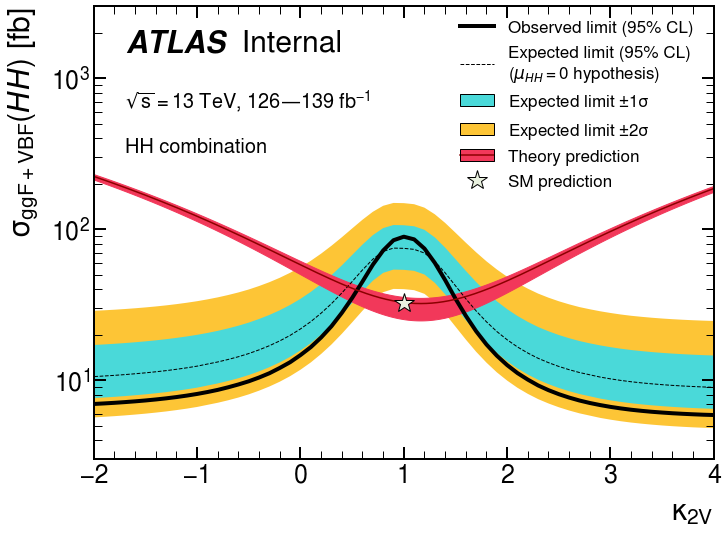

In [ ]:
output_dir = "/afs/ihep.ac.cn/users/c/cyz/besfs/HH_comb/hh_combination_fw/run/output_xsec_scan"
combfolder = 'bbbb_bbtautau_bbyy-fullcorr'
import sympy
def get_xsection_scan_limit(poi = 'kl'):
    kl_param_limit_df = {}
    channels = ['bbtautau','bbbb','bbyy']
    data = {}
    for channel in channels+['combined']:
        limit_path = os.path.join(output_dir, 'limit/nonres', channel, combfolder if channel=='combined' else '', 'xsec_'+poi, 'limits_xsec_br.json')
        data[channel] = json.load(open(limit_path))
        
    for channel in data:
        df = pd.DataFrame(data[channel]).set_index([poi])
        kl_param_limit_df[channel] = df

    return kl_param_limit_df
def get_theory_combination_function(mH=125):
    # https://twiki.cern.ch/twiki/bin/view/LHCPhysics/LHCHWGHH?redirectedfrom=LHCPhysics.LHCHXSWGHH
    sm_N3LO_xsec = {
        '125.09': 1.723,
        '125': 1.726,
    }[str(mH)]

    # Below xsec values are from AMI as of 9 December 2020, for tag: e8263_e7400_s3126_r10201
    basis_xsec_list = [
        # ([k2v, kl, kv], xsec)
        ([1, 1, 1], 1.18),
        ([1.5, 1, 1], 2.30),
        ([2, 1, 1], 9.97),
        ([1, 0, 1], 3.17),
        ([1, 10, 1], 67.4),
        ([1, 1, 1.5], 45.4),
    ]
    xsec_correction = sm_N3LO_xsec / basis_xsec_list[0][1]

    theory_basis_list, xsec_list = zip(*basis_xsec_list)
    corrected_xsecs = [xsec * xsec_correction for xsec in xsec_list]

    theory_amplitude_function = get_amplitude_function(
        theory_basis_list, full_amplitude=True
    )
    theory_combination_function = lambda couplings: theory_amplitude_function(
        *couplings, *corrected_xsecs
    )
    return theory_combination_function

def get_amplitude_function(basis_list, full_amplitude=False, diagram_term_list=None):
    basis_states = [[sympy.Rational(param) for param in basis] for basis in basis_list]

    _k2v = sympy.Symbol("\kappa_{2V}")
    _kl = sympy.Symbol("\kappa_{\lambda}")
    _kv = sympy.Symbol("\kappa_{V}")

    if diagram_term_list is None:
        diagram_term_list = [
            lambda k2v, kl, kv: kv ** 2 * kl ** 2,
            lambda k2v, kl, kv: kv ** 4,
            lambda k2v, kl, kv: k2v ** 2,
            lambda k2v, kl, kv: kv ** 3 * kl,
            lambda k2v, kl, kv: k2v * kl * kv,
            lambda k2v, kl, kv: kv ** 2 * k2v,
        ]

    combination_matrix = sympy.Matrix(
        [[term(*base) for term in diagram_term_list] for base in basis_states]
    )
    inversion = combination_matrix.inv()
    term_vector = sympy.Matrix([[term(_k2v, _kl, _kv)] for term in diagram_term_list])
    if full_amplitude:
        amplitudes = sympy.Matrix(
            [sympy.Symbol(f"A{n}") for n in range(len(diagram_term_list))]
        )
        final_amplitude = (term_vector.T * inversion * amplitudes)[0]
        amplitude_function = sympy.lambdify(
            [_k2v, _kl, _kv] + [*amplitudes], final_amplitude, "numpy"
        )
        return amplitude_function

    else:
        final_weight = term_vector.T * inversion
        reweight_vector = sympy.lambdify([_k2v, _kl, _kv], final_weight, "numpy")
        return reweight_vector
def get_theory_curve(k2v:np.ndarray):
    theory_xs_values = get_theory_combination_function()((np.array(k2v), 1, 1))
    theory_xs_values_ggf, theory_xs_upper_ggf, theory_xs_lower_ggf = theory_cross_section_kl(1, 'ggf')
    theory_xs_values += np.repeat(theory_xs_values_ggf, len(k2v))
    theory_xs_values_high = theory_xs_values+np.repeat(theory_xs_upper_ggf-theory_xs_values_ggf, len(k2v))
    theory_xs_values_low = theory_xs_values+np.repeat(theory_xs_lower_ggf-theory_xs_values_ggf, len(k2v))
    return k2v, theory_xs_values, theory_xs_values_high, theory_xs_values_low
def plot_xsection_scan_k2v(k2v_param_limit_df, channel, mH, production='vbf', poi='k2v', xmin=-2, xmax=4, add_individual=True, disable_error=False, status="int"):
    kl_value, kv_value = 1, 1

    theory_cross_section_k2v = get_theory_combination_function(mH)

    k2v_values =  k2v_param_limit_df['combined'].index.astype(float).values
    theory_xs_values = theory_cross_section_k2v((np.array(k2v_values), kl_value, kv_value))

    k2v_values_dense = np.linspace(min(k2v_values), max(k2v_values), 200000) 
    theory_xs_values_dense = theory_cross_section_k2v((np.array(k2v_values_dense), kl_value, kv_value))
    
    if production.lower() == 'vbf':
        pass # not include ggf xs
    elif production.lower() == 'all':
        # For k2v variations, take ggF xs as SM ggF xs
        theory_xs_values_ggf, theory_xs_upper_ggf, theory_xs_lower_ggf = theory_cross_section_kl(kl_value, 'ggf')
        theory_xs_values += np.repeat(theory_xs_values_ggf, len(k2v_values))
        theory_xs_values_dense += np.repeat(theory_xs_values_ggf, len(k2v_values_dense))
        theory_xs_values_high_dense = theory_xs_values_dense + theory_xs_values_dense*np.sqrt(0.0003**2 + 0.021**2)+np.repeat(theory_xs_upper_ggf-theory_xs_values_ggf, len(k2v_values_dense))
        theory_xs_values_low_dense = theory_xs_values_dense - theory_xs_values_dense*np.sqrt(0.0004**2 + 0.021**2)+np.repeat(theory_xs_lower_ggf-theory_xs_values_ggf, len(k2v_values_dense))
    else:
        assert(0), f'production {production} is not implemented'
        
        
    analysis_label_options = {
        'status': status,
        'loc': (0.05, 0.95),
        'energy': '13 TeV',
        'lumi': r'126—139 fb$^{-1}$',
        'fontsize': 30,
        'extra_text':channel_text[channel] # + '//Parameterised workspace'    
    }
    styles = {
        'legend':{
            'loc': (0.58, 0.58),
            'fontsize': 17
        },
        'axis':{
            'tick_bothsides': True,
            'major_length': 12,
            'labelsize': 25,
        },
        'xlabel': {
            'fontsize': 30,
        },
        'ylabel': {
            'fontsize': 30,
        },
    }
    config = {
        'observed_plot_styles': {
            'marker': None,
            'alpha': 1,
            'linewidth': 4
        }}
    
    poi_name = {
        'klambda': r'$\kappa_\lambda$',
        'k2v': r'$\kappa_{2V}$',
    }
    ylabel = {
        'vbf': r"$\sigma_{VBF}(\mathit{HH})$ [fb]",
        'all': r"$\sigma_{ggF+VBF}(\mathit{HH})$ [fb]",
    }
    
    plotter = UpperLimit2DPlot(k2v_param_limit_df[channel],  labels={'expected': 'Expected limit (95% CL)\n'+r'($\mathit{\mu_{HH}} = 0$ hypothesis)'},
                               styles=styles,theory_func=get_theory_curve,config=config,
                               analysis_label_options=analysis_label_options)
    plotter.add_curve(k2v_values_dense, theory_xs_values_dense, theory_xs_values_low_dense, theory_xs_values_high_dense, 
    # plotter.add_curve(k2v_values_dense, theory_xs_values_dense, theory_xs_values_dense, theory_xs_values_dense, 
                      label="Theory prediction")
    SM_xs = theory_cross_section_k2v((1, kl_value, kv_value))
    if production.lower() == 'all':
        SM_xs += theory_cross_section_kl(1, 'ggf')[0]
    plotter.add_highlight(1, SM_xs, label="SM prediction")
    xmin = k2v_param_limit_df[channel].index.min() if not xmin else xmin
    xmax = k2v_param_limit_df[channel].index.max() if not xmax else xmax
    ylim = {
        'klambda': [10, 1e5],
        'k2v': [3, 3e3],
    }
    ax = plotter.draw(xlabel=poi_name[poi], ylabel=ylabel[production.lower()],scale_theory=True, draw_theory_curve=True, 
                 draw_observed=True, logy=True, ylim=ylim[poi], xlim=[xmin, xmax], draw_errorband=not disable_error)
    intersections = get_intersections2(k2v_values, 
                                      theory_xs_values*k2v_param_limit_df[channel]['0'],
                                      k2v_values_dense, theory_xs_values_dense)

    intersections_obs = get_intersections2(k2v_values, 
                                      theory_xs_values*k2v_param_limit_df[channel]['obs'],
                                      k2v_values_dense, theory_xs_values_dense)
    # ax.annotate(r'Expected: '+poi_name[poi]+'$ \in [%.1f, %.1f]$' %(intersections[0], intersections[1]), 
    #             (0.05, 0.08), xycoords = 'axes fraction', fontsize = 18)
    # ax.annotate(r'Observed: '+poi_name[poi]+'$ \in [%.1f, %.1f]$' %(intersections_obs[0], intersections_obs[1]), 
    #             (0.05, 0.15), xycoords = 'axes fraction', fontsize = 18)
    print(channel, 'obs', intersections_obs[0], intersections_obs[1])
    print(channel, 'exp', intersections[0], intersections[1])
    
    # Add individual curves on top
    if channel == 'combined' and add_individual:
        plot_individual(channel, ax, plotter, k2v_param_limit_df)

    suffix = ''
    if add_individual:
        suffix += '_withindiv'
    if disable_error:
        suffix += '_noError'
    save_foler = output_dir+f"/figures/xsection_scan/{status}/"
    os.makedirs(save_foler, exist_ok=True)
    filename = save_foler+f"{poi}_limit_{channel}{suffix}_{status}.pdf"
    plt.savefig(filename, bbox_inches="tight")
    print("save to", filename)
    plt.show()
mH = 125
production = 'all'
status = 'int'
k2v_param_limit_df = get_xsection_scan_limit(poi = 'k2v')
plot_xsection_scan_k2v(k2v_param_limit_df, 'combined', mH, production, 'k2v', xmin=-2, xmax=4, add_individual=False, status=status)